In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
file = 'global_data_4_1'
time_bins = np.arange(0,24,float(file.split('_')[-1]))
H_bins = np.arange(90,130,float(file.split('_')[-2]))

shape = len(time_bins) * len(H_bins)

file_path = f'../../Output/{file}.csv'

48549


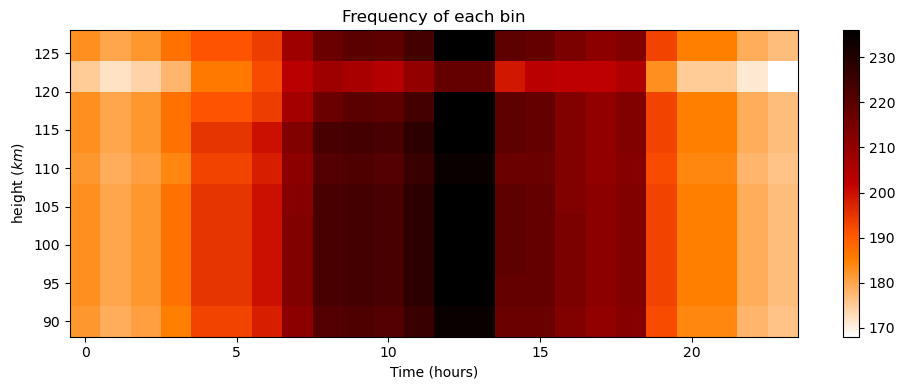

In [4]:
data_df = pd.read_csv(file_path,low_memory=False)
Ne_EXP = np.array(data_df['EXP Density']).reshape(-1,shape)
exp_data_points = np.array(data_df['Experimental Data Points'])
model_data_points = np.array(data_df['Model Data Points'])
height = np.array(data_df['Height']).reshape(-1, len(H_bins), len(time_bins))[0]
hours = np.array(data_df['Hours']).reshape(-1, len(H_bins), len(time_bins))[0]
Svalbard = np.array(data_df ['Svalbard']).reshape(-1,shape)[:,0] == 1
Tromso = np.array(data_df['Tromso']).reshape(-1,shape)[:,0] == 1
Geomagnetic_Event = np.array(data_df['Geomagnetic Event']).reshape(-1,shape)[:,0] == 1
Solar_Proton_Event = np.array(data_df['Solar Proton Event']).reshape(-1,shape)[:,0] == 1

mask, type = np.repeat(True, len(Ne_EXP)), 'all'
#mask, type = Svalbard, 'Svalbard'
#mask, type = Tromso, 'Tromso'
#mask, type = Geomagnetic_Event, 'geo'
#mask, type = Solar_Proton_Event, 'sol'
#mask, type = (~Geomagnetic_Event) * (~Solar_Proton_Event), 'quiet'
#mask, type = (Geomagnetic_Event) + (Solar_Proton_Event), 'active'

Ne_EXP = Ne_EXP[mask]

zero_mask = Ne_EXP != 0

print(np.sum(zero_mask))

grid = np.sum(zero_mask, axis=0).reshape(len(H_bins), len(time_bins))

fig, ax = plt.subplots(1, figsize=(10,4))
X, Y = np.meshgrid(time_bins, H_bins)
mesh = ax.pcolormesh(X, Y, grid, cmap = 'gist_heat_r')
cbar = fig.colorbar(mesh, ax=ax)
ax.set_title('Frequency of each bin')
ax.set_xlabel(r'Time (hours)')
ax.set_ylabel(r'height ($km$)')
plt.tight_layout()
plt.savefig(f'../../Output/Figures/{type}/Bin-Repartition.png')
plt.show()

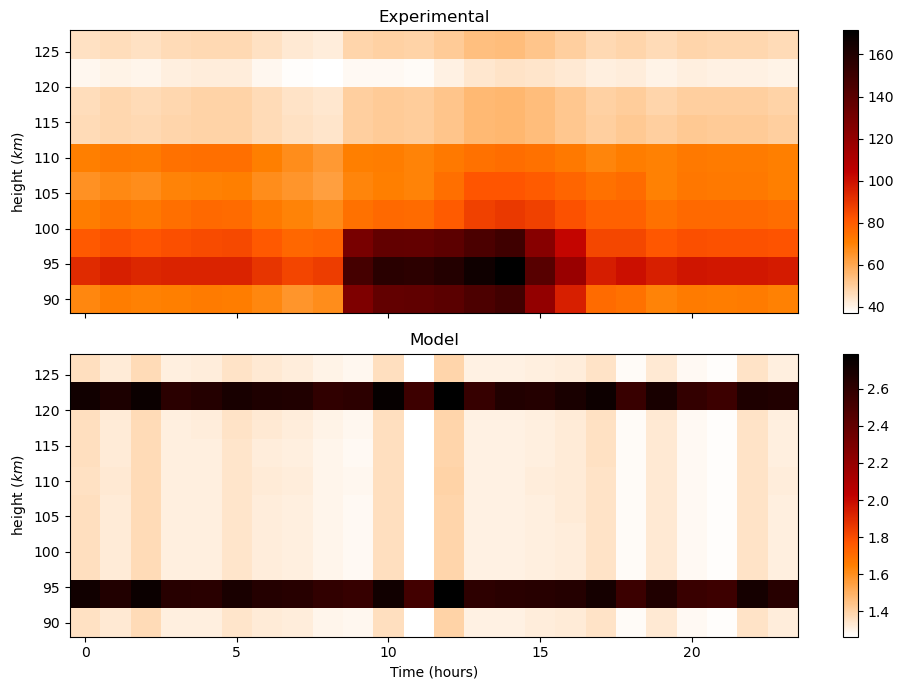

In [5]:
exp_grid = np.sum(exp_data_points.reshape(-1, shape), axis=0).reshape(len(H_bins), len(time_bins))
model_grid = np.sum(model_data_points.reshape(-1, shape), axis=0).reshape(len(H_bins), len(time_bins))

X, Y = np.meshgrid(time_bins, H_bins)

fig, axs = plt.subplots(2, figsize=(10,7), sharex = True)

mesh = axs[0].pcolormesh(X, Y, exp_grid/grid, cmap = 'gist_heat_r')
cbar = fig.colorbar(mesh, ax=axs[0])
axs[0].set_title('Experimental')
axs[0].set_ylabel(r'height ($km$)')
mesh = axs[1].pcolormesh(X, Y, model_grid/grid, cmap = 'gist_heat_r')
cbar = fig.colorbar(mesh, ax=axs[1])
axs[1].set_title('Model')
axs[1].set_xlabel(r'Time (hours)')
axs[1].set_ylabel(r'height ($km$)')
plt.tight_layout()
plt.savefig(f'../../Output/Figures/{type}/Data-Point-Density.png')
plt.show()